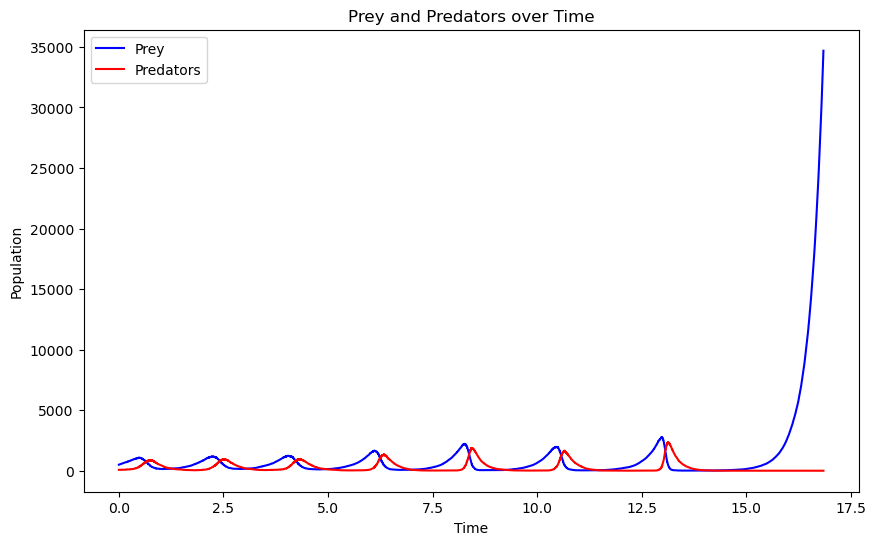

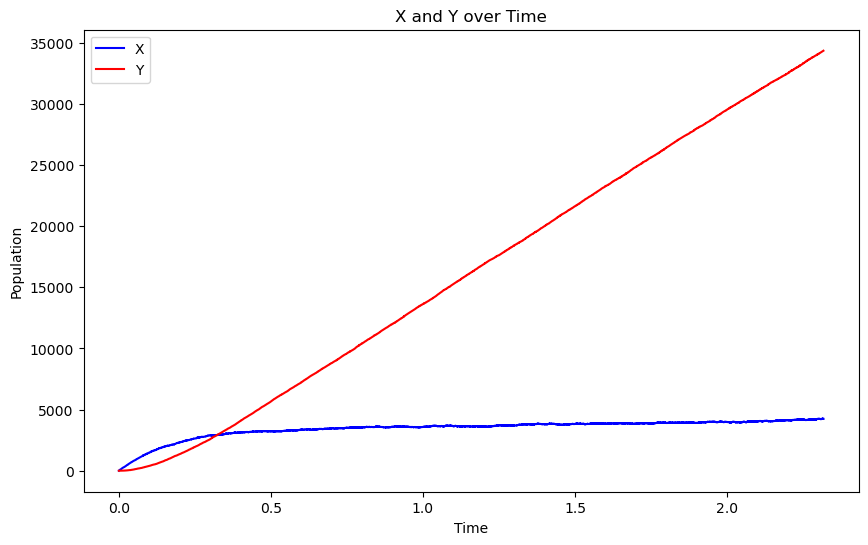

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MAX_ITER = 100000

def rand_uniform():
    return np.random.random()

def gillespie_lotka_volterra(k1, k2, k3, prey, predators, T):
    times = []
    prey_count = []
    predator_count = []
    
    t = 0.0
    i = 0

    while t < T and i < MAX_ITER:
        rate1 = k1 * prey
        rate2 = k2 * prey * predators
        rate3 = k3 * predators

        total_rate = rate1 + rate2 + rate3
        if total_rate <= 0:
            break

        r1 = rand_uniform()
        r2 = rand_uniform()

        t += -np.log(r1) / total_rate

        if r2 < rate1 / total_rate:
            prey += 1
        elif r2 < (rate1 + rate2) / total_rate:
            prey -= 1
            predators += 1
        else:
            predators -= 1

        times.append(t)
        prey_count.append(prey)
        predator_count.append(predators)
        i += 1

    return np.array(times), np.array(prey_count), np.array(predator_count)

def gillespie_brusselator(a, b, X, Y, volume, T):
    times = []
    X_count = []
    Y_count = []

    t = 0.0
    i = 0

    while t < T and i < MAX_ITER:
        rate1 = a * volume
        rate2 = X
        rate3 = (X * (X-1) * Y) / (volume**2)
        rate4 = b*X

        total_rate = rate1 + rate2 + rate3 + rate4
        if total_rate <= 0:
            break

        r1 = rand_uniform()
        r2 = rand_uniform()

        t += -np.log(r1) / total_rate

        if r2 < rate1 / total_rate:
            X += 1
        elif r2 < (rate1 + rate2) / total_rate:
            X -= 1
            
        elif r2 < (rate1 + rate2 + rate3) / total_rate:
            X += 1
            Y -= 1
        elif r2 < (rate1 + rate2 + rate3 + rate4) / total_rate:
            X-=1
            Y+=1
        else:
            X-=1
        

        times.append(t)
        X_count.append(X)
        Y_count.append(Y)
        i += 1

    return np.array(times), np.array(X_count), np.array(Y_count)

def save_results(file_path, times, counts1, counts2, labels):
    data = pd.DataFrame({
        'Time': times,
        labels[0]: counts1,
        labels[1]: counts2
    })
    data.to_csv(file_path, index=False)

def plot_results(file_path, labels):
    data = pd.read_csv(file_path)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Time'], data[labels[0]], label=labels[0], color='blue')
    plt.plot(data['Time'], data[labels[1]], label=labels[1], color='red')
    plt.xlabel('Time')
    plt.ylabel('Population')
    #plt.xlim(0,5)
    plt.title(f'{labels[0]} and {labels[1]} over Time')
    plt.legend()
    plt.show()

# Simulation parameters
k1 = 3.0
k2 = 0.01
k3 = 5.0
prey = 500
predators = 75
T = 100.0

# Run Lotka-Volterra simulation
times, prey_count, predator_count = gillespie_lotka_volterra(k1, k2, k3, prey, predators, T)
save_results("lotka_volterra_output.csv", times, prey_count, predator_count, ['Prey', 'Predators'])
plot_results("lotka_volterra_output.csv", ['Prey', 'Predators'])

# Simulation parameters for Brusselator model
a = 2.0
b = 5.0
X = 2
Y = 3
volume = 10000

# Run Brusselator simulation
times, X_count, Y_count = gillespie_brusselator(a, b, X, Y, volume, T)
save_results("brusselator_output.csv", times, X_count, Y_count, ['X', 'Y'])
plot_results("brusselator_output.csv", ['X', 'Y'])


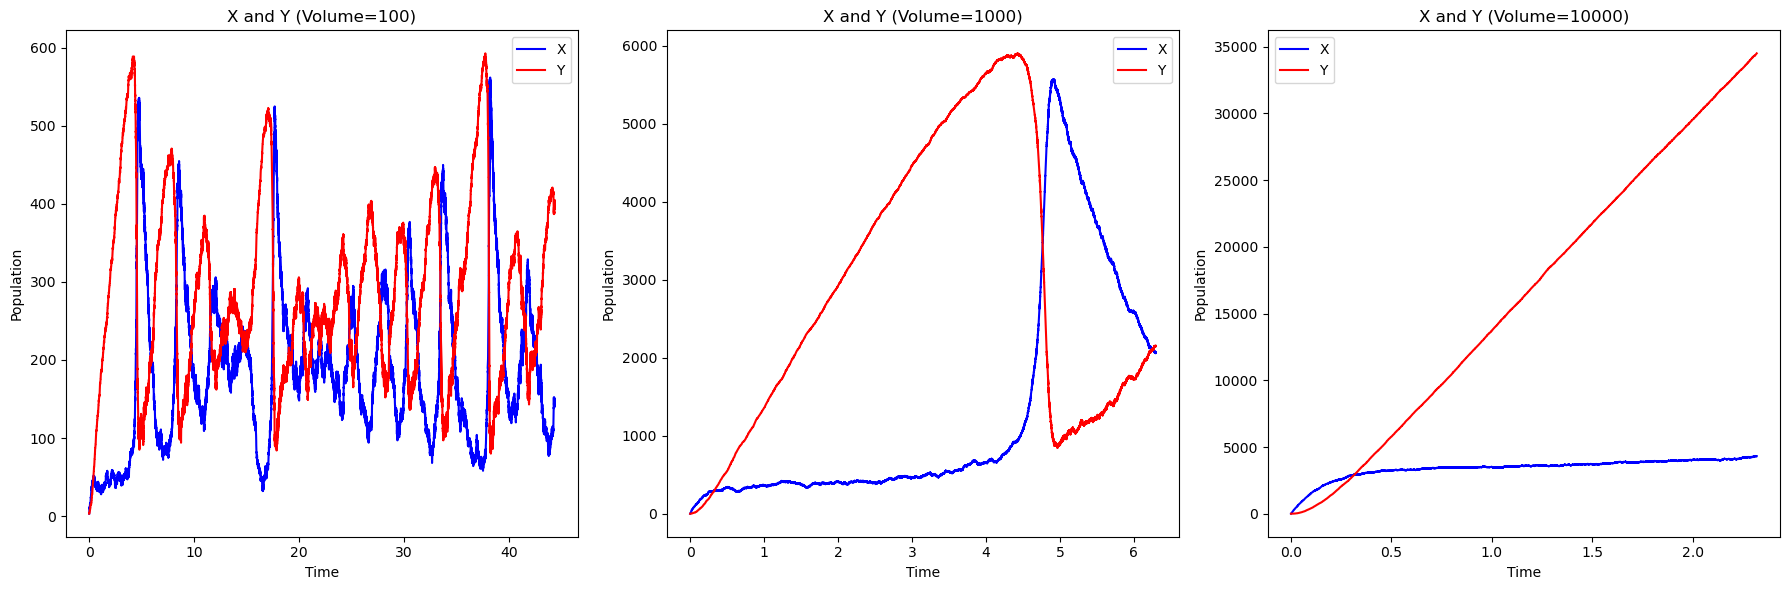

In [8]:
def plot_multiple_results(file_paths, labels):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, file_path in enumerate(file_paths):
        data = pd.read_csv(file_path)
        axs[i].plot(data['Time'], data[labels[0]], label=labels[0], color='blue')
        axs[i].plot(data['Time'], data[labels[1]], label=labels[1], color='red')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Population')
        axs[i].set_title(f'{labels[0]} and {labels[1]} (Volume={volumes[i]})')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Volumi da simulare
volumes = [10**2, 10**3, 10**4]
file_paths = []

for volume in volumes:
    times, X_count, Y_count = gillespie_brusselator(a, b, X, Y, volume, T)
    file_path = f"brusselator_output_vol_{volume}.csv"
    save_results(file_path, times, X_count, Y_count, ['X', 'Y'])
    file_paths.append(file_path)

# Mostra i grafici
plot_multiple_results(file_paths, ['X', 'Y'])


In [9]:
def plot_results_vs_steps(times, counts1, counts2, labels):
    plt.figure(figsize=(10, 6))
    steps = np.arange(len(times))
    plt.plot(steps, counts1, label=labels[0], color='blue')
    plt.plot(steps, counts2, label=labels[1], color='red')
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Population')
    plt.title(f'{labels[0]} and {labels[1]} over Monte Carlo Steps')
    plt.legend()
    plt.show()


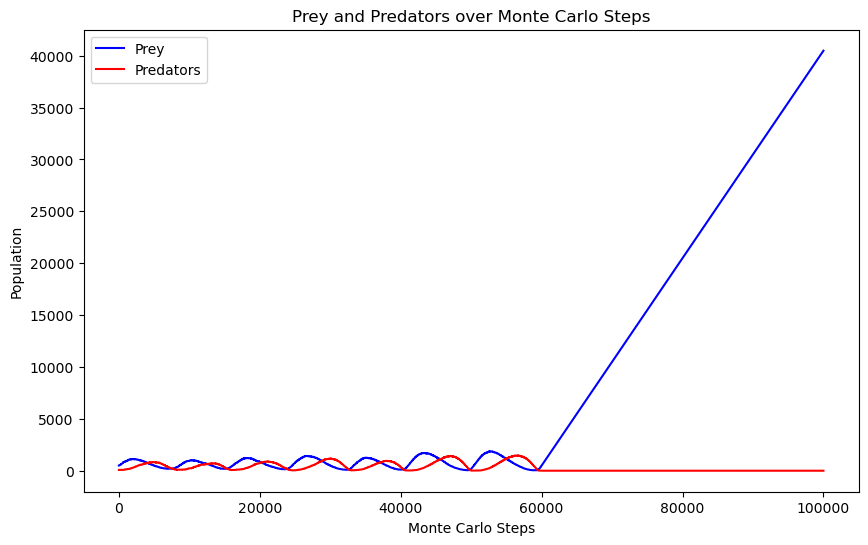

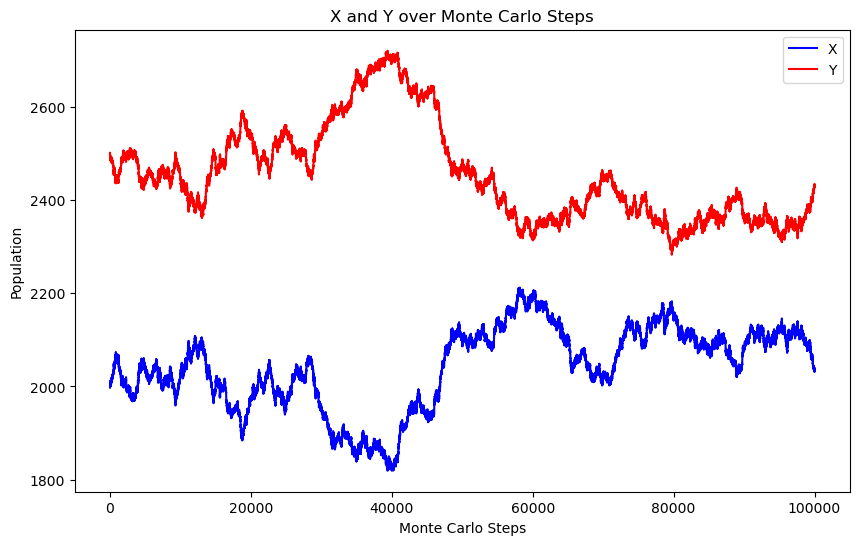

In [57]:
# Run Lotka-Volterra simulation
times, prey_count, predator_count = gillespie_lotka_volterra(k1, k2, k3, prey, predators, T)
save_results("lotka_volterra_output.csv", times, prey_count, predator_count, ['Prey', 'Predators'])
plot_results_vs_steps(times, prey_count, predator_count, ['Prey', 'Predators'])

# Run Brusselator simulation
times, X_count, Y_count = gillespie_brusselator(a, b, X, Y, volume, T)
save_results("brusselator_output.csv", times, X_count, Y_count, ['X', 'Y'])
plot_results_vs_steps(times, X_count, Y_count, ['X', 'Y'])


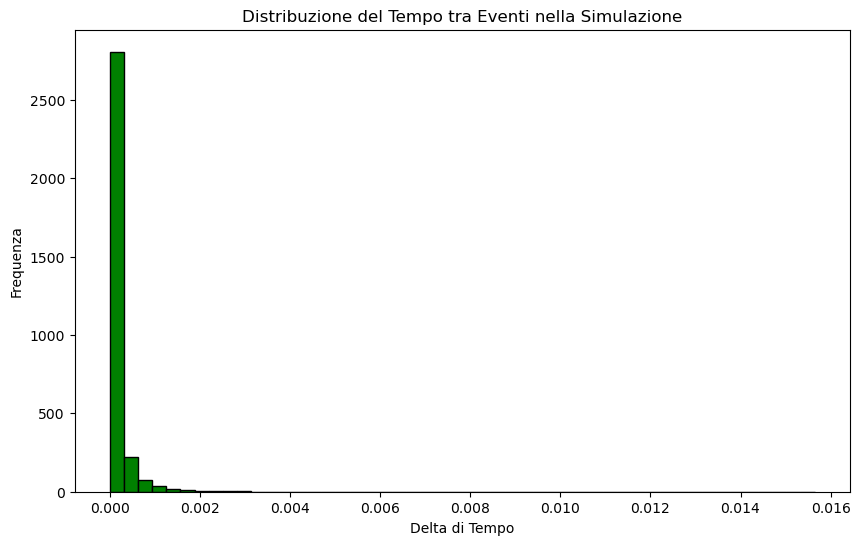

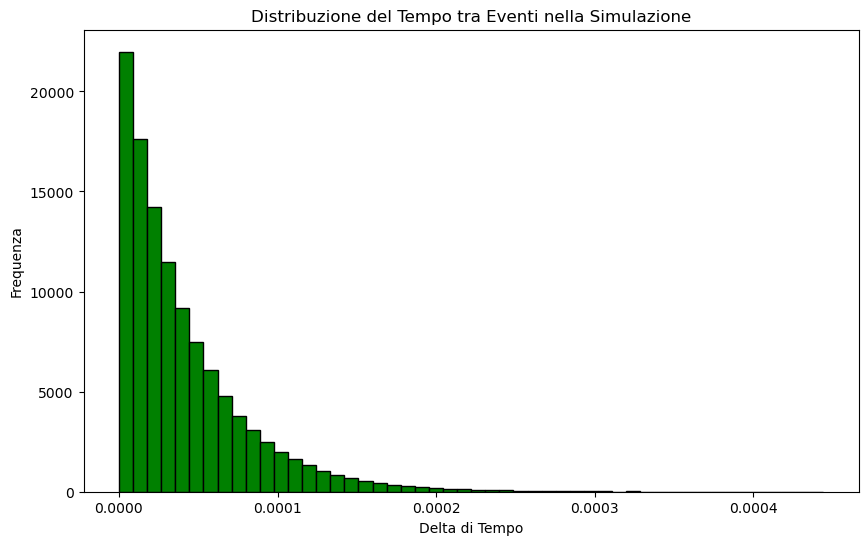

In [59]:
def plot_time_distribution(file_path):
    data = pd.read_csv(file_path)
    
    # Calcola i delta di tempo tra un evento e l'altro
    time_deltas = np.diff(data['Time'])
    
    plt.figure(figsize=(10, 6))
    plt.hist(time_deltas, bins=50, color='green', edgecolor='black',density=True)
    plt.xlabel('Delta di Tempo')
    plt.ylabel('Frequenza')
    plt.title('Distribuzione del Tempo tra Eventi nella Simulazione')
    plt.show()
# Dopo aver eseguito la simulazione di Lotka-Volterra
plot_time_distribution("lotka_volterra_output.csv")

# Dopo aver eseguito la simulazione del Brusselatore
plot_time_distribution("brusselator_output.csv")


In [69]:
def plot_lotka_volterra_comparison():
    # Parametri della prima simulazione
    k1 = 3.0
    k2 = 0.01
    k3 = 5.0
    prey1 = 500
    predators1 = 280
    T = 100.0
    
    # Parametri della seconda simulazione
    prey2 = 500
    predators2 = 75
    
    # Esegui la simulazione con la prima condizione iniziale
    times1, prey_count1, predator_count1 = gillespie_lotka_volterra(k1, k2, k3, prey1, predators1, T)
    
    # Esegui la simulazione con la seconda condizione iniziale
    times2, prey_count2, predator_count2 = gillespie_lotka_volterra(k1, k2, k3, prey2, predators2, T)
    
    # Crea la figura con due subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Primo subplot
    ax1.plot(times1, prey_count1, label='Prey', color='blue')
    ax1.plot(times1, predator_count1, label='Predators', color='red')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population')
    ax1.set_title('Simulation 1: Prey=500, Predators=280')
    ax1.legend()
    
    # Secondo subplot
    ax2.plot(times2, prey_count2, label='Prey', color='blue')
    ax2.plot(times2, predator_count2, label='Predators', color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Population')
    ax2.set_title('Simulation 2: Prey=500, Predators=75')
    ax2.legend()
    
    # Mostra i plot
    plt.tight_layout()
    plt.show()


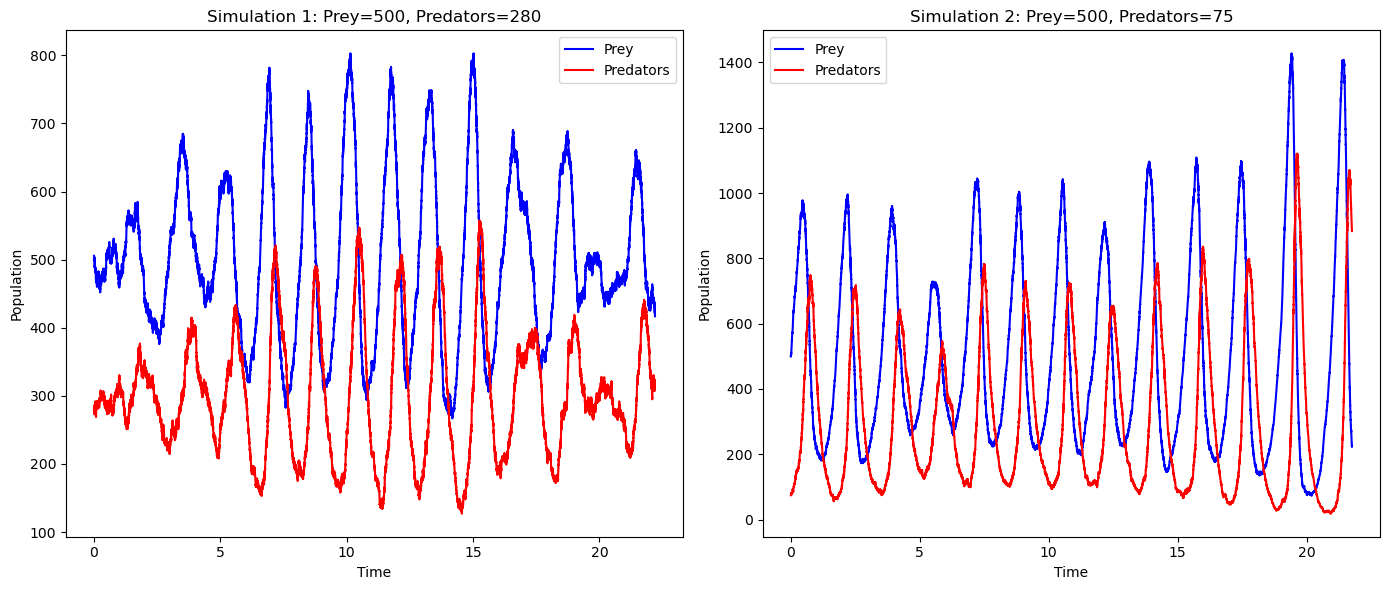

In [70]:
plot_lotka_volterra_comparison()


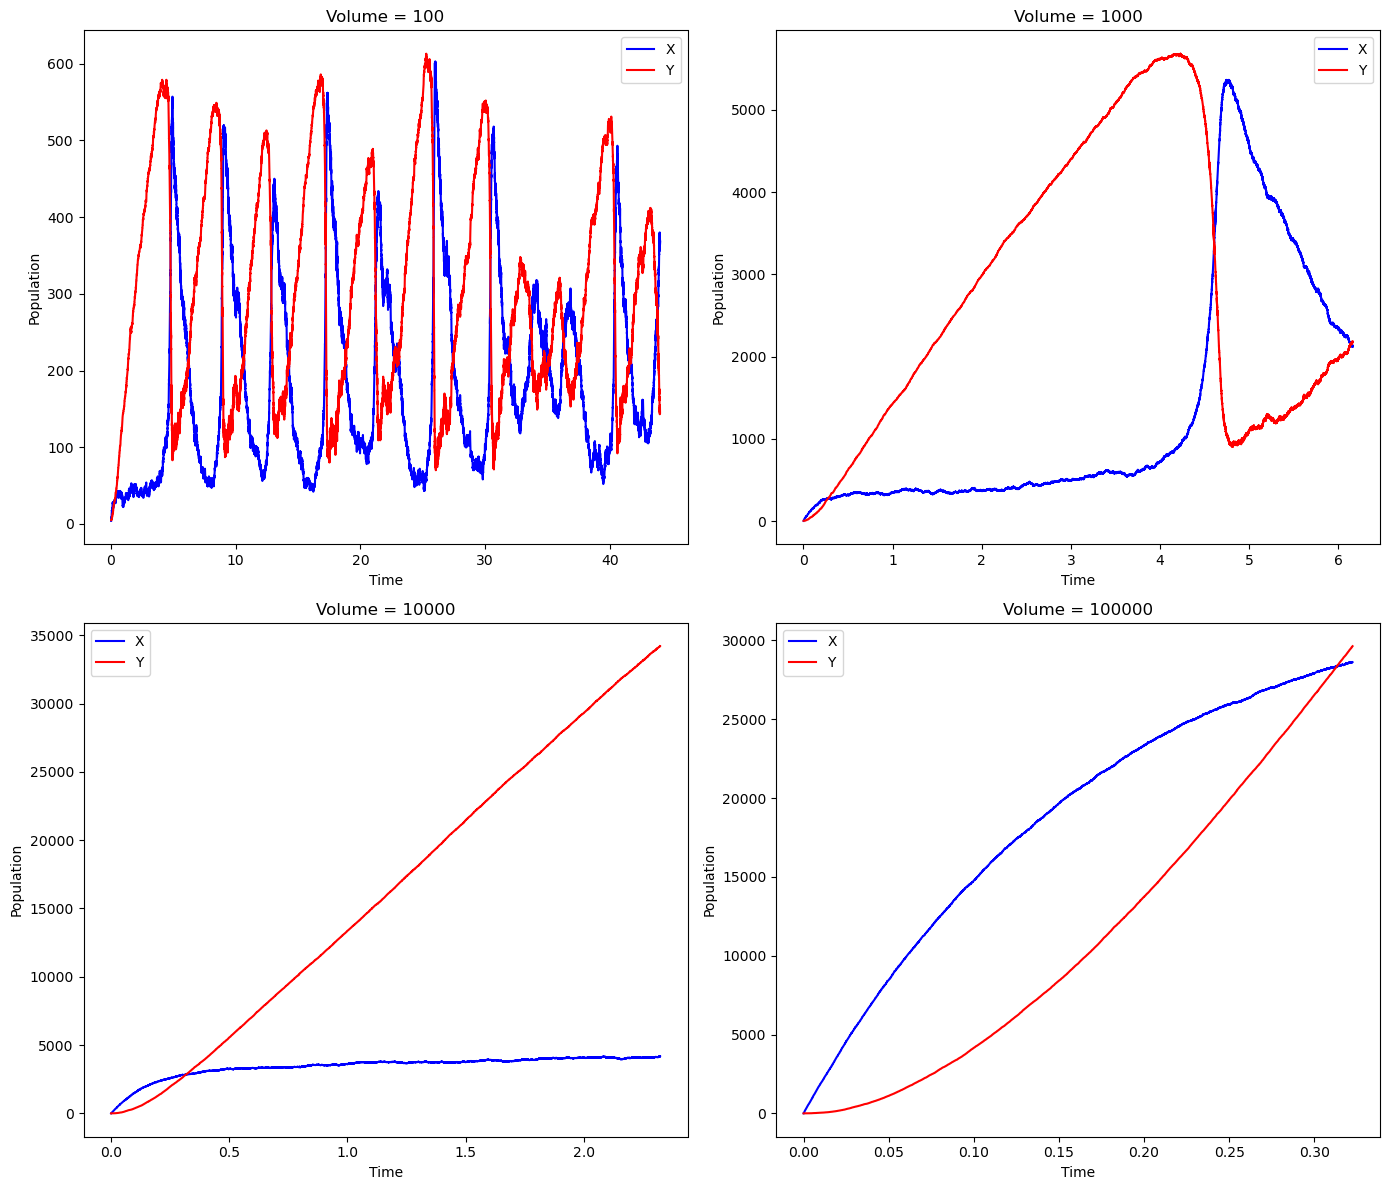

In [15]:
def plot_brusselator_volume_comparison():
    # Parametri fissi
    a = 2.0
    b = 5.0
    X_initial = 3
    Y_initial = 5
    volumes = [10**2, 10**3, 10**4, 10**5]  # Diversi volumi per le simulazioni
    T = 100.0
    
    # Crea la figura con quattro subplot
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()  # Rende più facile l'accesso agli assi

    # Loop sui volumi e esegui la simulazione per ciascun volume
    for i, volume in enumerate(volumes):
        times, X_count, Y_count = gillespie_brusselator(a, b, X_initial, Y_initial, volume, T)
        
        # Plot per ogni subplot
        axs[i].plot(times, X_count, label='X', color='blue')
        axs[i].plot(times, Y_count, label='Y', color='red')
        axs[i].set_xlabel('Time')
        axs[i].set_ylabel('Population')
        axs[i].set_title(f'Volume = {volume}')
        axs[i].legend()
    
    # Mostra i plot
    plt.tight_layout()
    plt.show()



# Esegui il confronto dei volumi
plot_brusselator_volume_comparison()
